<a href="https://colab.research.google.com/github/dubrovskaya/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [2]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-12-04 23:01:50--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.139.13
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.139.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  42.0MB/s    in 4.3s    

2019-12-04 23:01:54 (45.7 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [3]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [4]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [5]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [0]:
#From order_products: product_id, order_id. From products: product_id, product_name

#Top product_id's ordered from order_products: 

order_products=pd.concat([pd.read_csv('order_products__prior.csv'), pd.read_csv('order_products__train.csv')])


In [0]:
#Counts of Top 10 ordered products:
result=order_products.pivot_table(index='product_id', values='order_id', aggfunc=len).sort_values(by='order_id', ascending=False)[0:10].rename(columns={'order_id': 'count'}).reset_index()


In [9]:
#Match product names to product_ids
products = pd.read_csv('products.csv')
result.merge(products[['product_name', 'product_id']])


,product_id,count,product_name
0,24852,491291,Banana
1,13176,394930,Bag of Organic Bananas
2,21137,275577,Organic Strawberries
3,21903,251705,Organic Baby Spinach
4,47209,220877,Organic Hass Avocado
5,47766,184224,Organic Avocado
6,47626,160792,Large Lemon
7,16797,149445,Strawberries
8,26209,146660,Limes
9,27845,142813,Organic Whole Milk


## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [10]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])
print(table1)

table2 = table1.T

table2

              treatmenta  treatmentb
John Smith           NaN           2
Jane Doe            16.0          11
Mary Johnson         3.0           1


,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [11]:
#table1 -> tidy

table1.reset_index().melt(id_vars='index')

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [12]:
# table2 -> tidy

table2.reset_index().melt(id_vars='index')

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
# tidy -> table2

In [0]:
flights = sns.load_dataset('flights')

In [15]:
# Flights Pivot Table
flights.head()

#how many passengers on average each year

flights.pivot_table(index='year',values='passengers', aggfunc='mean')

,passengers
year,
1949,126.666667
1950,139.666667
1951,170.166667
1952,197.000000
1953,225.000000
1954,238.916667
1955,284.000000
1956,328.250000
1957,368.416667


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [16]:
#First, getting products that have over 2900 orders: 

counts = order_products.pivot_table(index='product_id', values='order_id', aggfunc=len).sort_values(by='order_id',ascending=False).rename(columns={'order_id':'count'})
condition = counts['count'] > 2900
popular_products = counts[condition].reset_index()
popular_products.head()


,product_id,count
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877


In [17]:
#Subsetorder_products to only include data from popular products

subset_product_ordered=order_products[order_products['product_id'].isin(popular_products['product_id'])]

print(subset_product_ordered.shape)
subset_product_ordered.head()

(22450886, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
5,2,17794,6,1
9,3,33754,1,1


In [0]:
#load orders csv to get information about hte time of day of the order
orders=pd.read_csv('orders.csv')

In [19]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [20]:
result=(subset_product_ordered.merge(products[['product_id','product_name']])).merge(orders[['order_id','order_hour_of_day']])
result.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,order_hour_of_day
0,2,33120,1,1,Organic Egg Whites,9
1,2,28985,2,1,Michigan Organic Kale,9
2,2,9327,3,0,Garlic Powder,9
3,2,17794,6,1,Carrots,9
4,26,33120,5,0,Organic Egg Whites,16


In [21]:
result.shape

(22450886, 6)

In [22]:
#let's get when on average the products are being ordered and get top 25 latest: 

avg_time=result.pivot_table(index='product_name', values='order_hour_of_day', aggfunc='mean').rename(columns={'order_hour_of_day': 'mean_order_hour_of_day'})
latest25 = avg_time.sort_values(by='mean_order_hour_of_day', ascending=False).reset_index()[:25]
latest25

,product_name,mean_order_hour_of_day
0,Half Baked Frozen Yogurt,14.526986
1,The Tonight Dough™ Ice Cream,14.526299
2,Americone Dream® Ice Cream,14.394912
3,Half Baked® Ice Cream,14.388942
4,Phish Food® Ice Cream,14.373308
5,Milk and Cookies Ice Cream,14.369711
6,Sicilian Pistachio,14.306421
7,Chocolate Peanut Butter Cup Gelato,14.303480
8,Birthday Cake Light Ice Cream,14.292018
9,Cherry Garcia Ice Cream,14.270300


## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
#- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"

# Get top 25 latest and top 25 earliest ordered products. 

latest = latest25['product_name']

earliest25 = avg_time.sort_values(by='mean_order_hour_of_day', ascending=True).reset_index()[:25]
earliest = earliest25['product_name']



In [24]:
#Get order data for the latest and earliest products

condition = (result['product_name'].isin(latest)) | (result['product_name'].isin(earliest))

top_subset=result[condition]
top_subset['product_name'].value_counts()


Clementines                                                    32194
0% Greek Strained Yogurt                                       13651
Apples                                                         12883
Trail Mix                                                      12601
Extra Fancy Unsalted Mixed Nuts                                10030
Crunchy Oats 'n Honey Granola Bars                              9082
Zero Calorie Cola                                               8905
Chocolate Chip Cookie Dough Ice Cream                           8555
Mediterranean Mint Gelato                                       7656
Popcorn                                                         7102
Sea Salt Caramel Gelato                                         6973
Original Beef Jerky                                             6697
Half And Half Cream                                             6504
Americone Dream® Ice Cream                                      6447
Strawberry Ice Cream              

In [25]:
df= pd.crosstab(top_subset['product_name'], top_subset['order_hour_of_day'], values='order_id', aggfunc=len, normalize='index')
final_late=df.reset_index().melt(id_vars='product_name')
final_late.head()


,product_name,order_hour_of_day,value
0,0% Greek Strained Yogurt,0,0.003516
1,Americone Dream® Ice Cream,0,0.005274
2,Apples,0,0.003803
3,Birthday Cake Light Ice Cream,0,0.005676
4,Caramel Cookie Crunch Gelato,0,0.006297


In [0]:
#Add category -- late or early to the final DF 
def check_kind(product):
  if product.isin(earliest):
    return 'early'
  elif product.isin(latest):
    return 'late'
  else: return 'none'

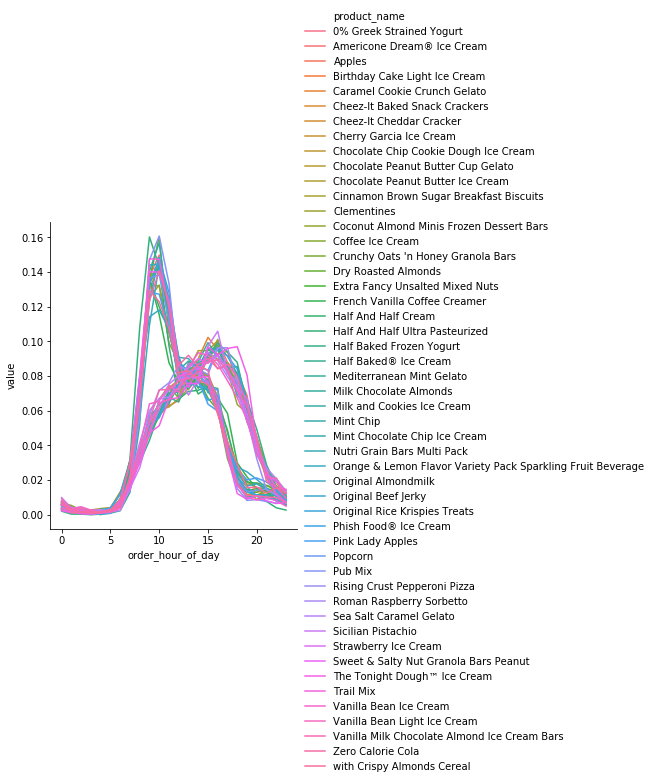

In [63]:
#Plot this data

sns.relplot(x='order_hour_of_day',
            y='value',
            hue='product_name',
            data=final_late,
            kind='line')


### Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"

In [28]:
result.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,order_hour_of_day
0,2,33120,1,1,Organic Egg Whites,9
1,2,28985,2,1,Michigan Organic Kale,9
2,2,9327,3,0,Garlic Powder,9
3,2,17794,6,1,Carrots,9
4,26,33120,5,0,Organic Egg Whites,16


In [29]:
counts=result.pivot_table(index='product_name', values='product_id', aggfunc=len).reset_index().rename(columns={'product_id': 'count'})
counts.head()

,product_name,count
0,0% Fat Free Organic Milk,4006
1,0% Greek Strained Yogurt,13651
2,1 Liter,4278
3,1% Low Fat Milk,8933
4,1% Lowfat Milk,14692


In [30]:
pct_reorder=result.pivot_table(index='product_name', values='reordered', aggfunc='mean').reset_index().rename(columns={'reordered': 'pct_reorder'})
pct_reorder.head()


,product_name,pct_reorder
0,0% Fat Free Organic Milk,0.710185
1,0% Greek Strained Yogurt,0.826826
2,1 Liter,0.737260
3,1% Low Fat Milk,0.792679
4,1% Lowfat Milk,0.814729


In [46]:
table1=counts.merge(pct_reorder)
table1.head()

,product_name,count,pct_reorder
0,0% Fat Free Organic Milk,4006,0.710185
1,0% Greek Strained Yogurt,13651,0.826826
2,1 Liter,4278,0.737260
3,1% Low Fat Milk,8933,0.792679
4,1% Lowfat Milk,14692,0.814729


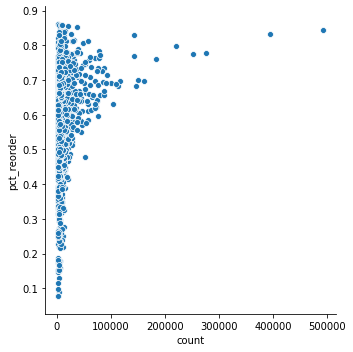

In [47]:
sns.relplot(x='count',
            y='pct_reorder',
            hue=None,
            data=table1,
            kind='scatter')

In [0]:

#Combining it in one line: 

table=result.pivot_table(index='product_name', values='reordered', aggfunc=[len, 'mean']).reset_index()


In [43]:
table.head()

,product_name,len,mean
,,reordered,reordered
0,0% Fat Free Organic Milk,4006,0.710185
1,0% Greek Strained Yogurt,13651,0.826826
2,1 Liter,4278,0.737260
3,1% Low Fat Milk,8933,0.792679
4,1% Lowfat Milk,14692,0.814729


In [59]:
#Add log scale for orders: 

table['log_scale']=np.log(table[('len', 'reordered')])
table.head()


,product_name,len,mean,log_scale
,,reordered,reordered,
0,0% Fat Free Organic Milk,4006,0.710185,8.295549
1,0% Greek Strained Yogurt,13651,0.826826,9.521568
2,1 Liter,4278,0.737260,8.361241
3,1% Low Fat Milk,8933,0.792679,9.097508
4,1% Lowfat Milk,14692,0.814729,9.595058


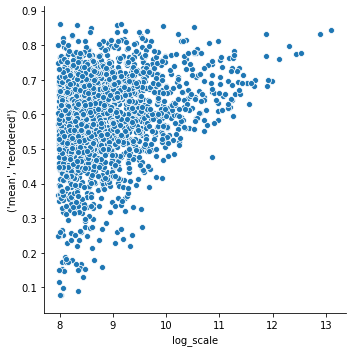

In [61]:
#this is how you call out those complicated column headers... 
#Looks nothing like an instacart stuff... well... 

sns.relplot(x= 'log_scale',
            y=('mean', 'reordered'),
            hue=None,
            data=table,
            kind='scatter')

####Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)

In [64]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [67]:
last_order_of_user=orders.pivot_table(index='user_id', values='order_number', aggfunc='max')
last_order_of_user.head()

,order_number
user_id,
1,11
2,15
3,13
4,6
5,5
